<a href="https://colab.research.google.com/github/Eyyup-kardes/YSA/blob/main/YAPAY_SINIR_AGLARI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#Pandas, Python'da veri analizi ve manipülasyonu için kullanılan güçlü bir kütüphanedir. Veri çerçeveleri (DataFrames) ve seriler (Series) gibi veri yapıları sunarak, veri okuma, temizleme, dönüştürme, gruplama ve analiz işlemlerini kolaylaştırır. Verilerin filtrelenmesi, sıralanması, eksik değerlerle başa çıkılması gibi işlemleri hızlı ve verimli bir şekilde yapmanıza olanak tanır.
#Ayrıca, büyük veri setlerini işlemek için oldukça verimli bir yöntemdir.

!pip install pandas textblob


In [64]:
import pandas as pd
from textblob import TextBlob

# yorumlar.csv dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Duygu analizi fonksiyonu
def sentiment_analysis(text):
    analysis = TextBlob(str(text))  # Yorumları analiz et
    polarity = analysis.sentiment.polarity
    if polarity >= 0:  # Pozitif ve nötr yorumlar olumlu olarak kabul edilir
        return 'olumlu'
    else:
        return 'olumsuz'

# Duygu analizini yorumlara uygula
df['Duygu'] = df['Yorum'].apply(sentiment_analysis)

# Olumlu ve olumsuz yorumların sayısını bul
olumlu_sayi = len(df[df['Duygu'] == 'olumlu'])
olumsuz_sayi = len(df[df['Duygu'] == 'olumsuz'])

# Sonuçları ekrana yazdır
print(f"Olumlu yorum sayısı: {olumlu_sayi}")
print(f"Olumsuz yorum sayısı: {olumsuz_sayi}")

# Tüm yorumları ve analizleri görüntüle
df[['Yorum', 'Duygu']]


Olumlu yorum sayısı: 330
Olumsuz yorum sayısı: 0


,Yorum,Duygu
0,kardesime aldım aşırı kaliteli içi sıcacık tut...,olumlu
1,çok iyi fiyatına göre kalite çok iyi m beden a...,olumlu
2,bu fiyata göre gerçekten iyi bir ürün bir bede...,olumlu
3,beklediğimden de iyi geldi kesinlikle tavsiye ...,olumlu
4,"Şahane oldu, çok premium hissettiriyor beden d...",olumlu
...,...,...
325,s beden istedim m beden göndermişler m istesey...,olumlu
326,cok kötü dikiş lerim hemen gidiyor hiç memnun ...,olumlu
327,ürün güzel kaliteli bedeninize göre sipariş ve...,olumlu
328,Güzel ürün kışlık,olumlu


In [65]:
import pandas as pd
from textblob import TextBlob

# yorumlar.csv dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Duygu analizi fonksiyonu
def sentiment_analysis(text):
    analysis = TextBlob(str(text))  # Yorumları analiz et
    polarity = analysis.sentiment.polarity
    if polarity > 0:  # Pozitif yorumlar olumlu
        return 'olumlu'
    elif polarity < 0:  # Negatif yorumlar olumsuz
        return 'olumsuz'
    else:  # Nötr yorumlar da olumlu kabul edilecek
        return 'olumlu'

# Duygu analizini yorumlara uygula
df['Duygu'] = df['Yorum'].apply(sentiment_analysis)

# Olumlu ve olumsuz yorumların sayısını bul
olumlu_sayi = len(df[df['Duygu'] == 'olumlu'])
olumsuz_sayi = len(df[df['Duygu'] == 'olumsuz'])

# Sonuçları ekrana yazdır
print(f"Olumlu yorum sayısı: {olumlu_sayi}")
print(f"Olumsuz yorum sayısı: {olumsuz_sayi}")

# Sadece olumsuz yorumları görüntüle
olumsuz_yorumlar = df[df['Duygu'] == 'olumsuz']
print("\nOlumsuz yorumlar:")
print(olumsuz_yorumlar[['Yorum', 'Duygu']])


Olumlu yorum sayısı: 330
Olumsuz yorum sayısı: 0

Olumsuz yorumlar:
Empty DataFrame
Columns: [Yorum, Duygu]
Index: []


In [66]:
import pandas as pd

# Yorumlar.csv dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Yorumlarındaki tüm harflerin sayısını hesapla
df['letter_count'] = df['Yorum'].apply(lambda x: sum(c.isalpha() for c in str(x)))

# Toplam harf sayısını hesapla
total_letters = df['letter_count'].sum()

# Sonucu yazdır
print(f"Toplam kullanılan harf sayısı: {total_letters}")


Toplam kullanılan harf sayısı: 17672


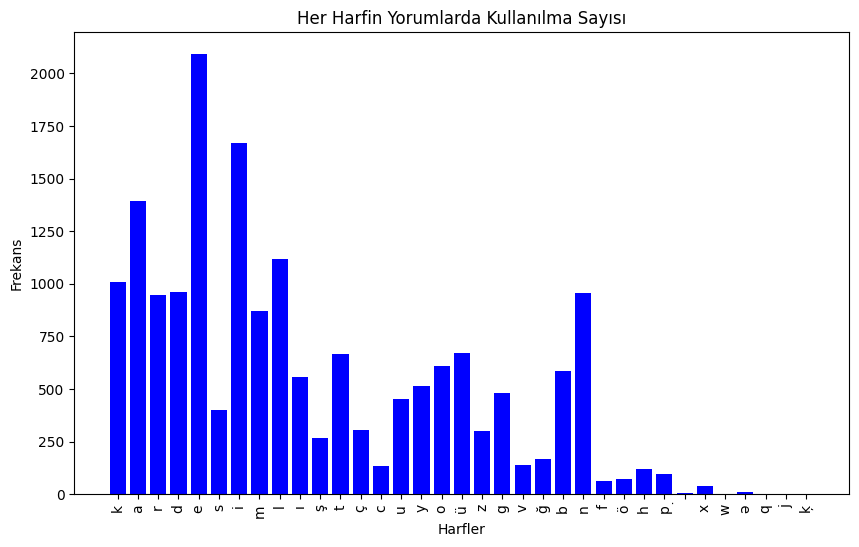

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Yorumlar.csv dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Yorumlarındaki harfleri al (sadece harfler ve küçük harfe dönüştür)
letters = ''.join(df['Yorum'].apply(lambda x: ''.join([c.lower() for c in str(x) if c.isalpha()])))

# Harflerin sayısını hesapla
letter_counts = Counter(letters)

# Harfleri ve sayıları ayır
letters = list(letter_counts.keys())
counts = list(letter_counts.values())

# Grafiği çiz
plt.figure(figsize=(10, 6))
plt.bar(letters, counts, color='blue')
plt.xlabel('Harfler')
plt.ylabel('Frekans')
plt.title('Her Harfin Yorumlarda Kullanılma Sayısı')
plt.xticks(rotation=90)
plt.show()


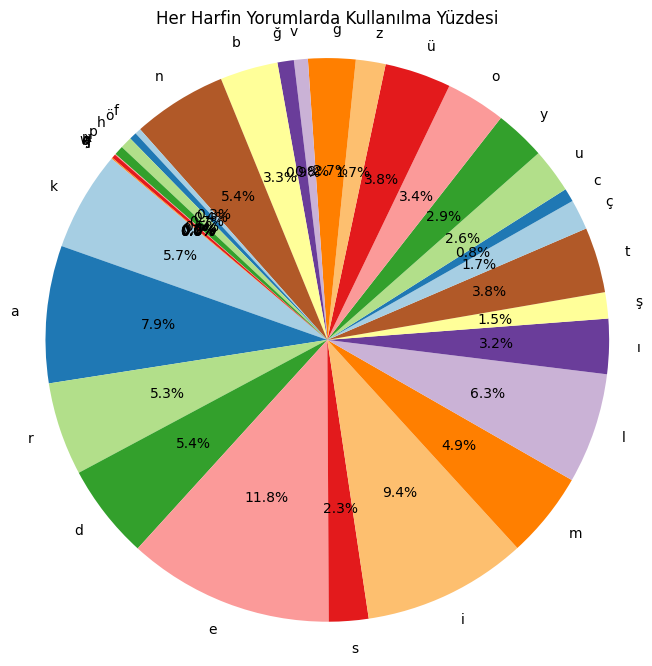

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Yorumlar.csv dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Yorumlarındaki harfleri al (sadece harfler ve küçük harfe dönüştür)
letters = ''.join(df['Yorum'].apply(lambda x: ''.join([c.lower() for c in str(x) if c.isalpha()])))

# Harflerin sayısını hesapla
letter_counts = Counter(letters)

# Harfleri ve sayıları ayır
letters = list(letter_counts.keys())
counts = list(letter_counts.values())

# Pasta grafiğini çiz
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=letters, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Her Harfin Yorumlarda Kullanılma Yüzdesi')
plt.axis('equal')  # Eşit eksenler için
plt.show()


çok: 199 kez kullanılmış
güzel: 138 kez kullanılmış
beden: 101 kez kullanılmış
ürün: 99 kez kullanılmış
bir: 81 kez kullanılmış
aldım: 62 kez kullanılmış
geldi: 61 kez kullanılmış
ederim: 51 kez kullanılmış
ve: 50 kez kullanılmış
kaliteli: 47 kez kullanılmış


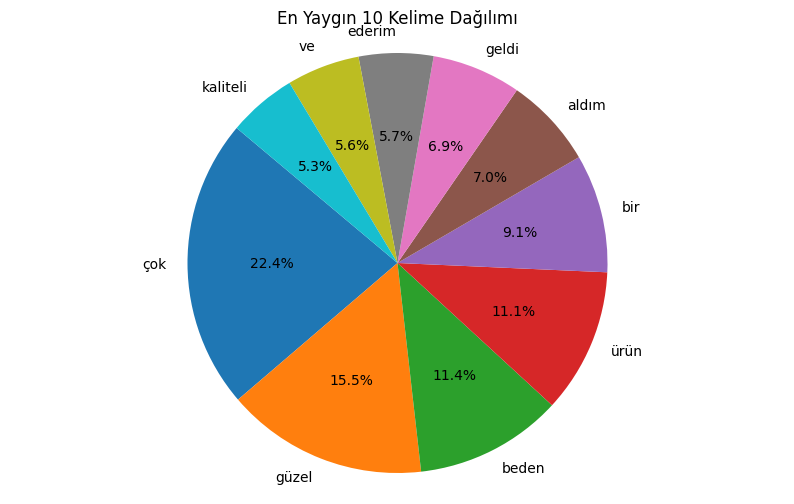

In [69]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

# Yorumlar.csv dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Yorumlar sütununu al
comments = df['Yorum'].dropna()  # Boş satırları atla

# Tüm yorumları küçük harfe çevirip, sadece harf ve boşlukları bırak
all_text = ' '.join(comments).lower()
all_text = re.sub(r'[^a-zçğıöşü]+', ' ', all_text)

# Kelimeleri ayır ve sıklıklarını hesapla
words = all_text.split()
word_counts = Counter(words)

# En yaygın 10 kelimeyi bul
most_common_words = word_counts.most_common(10)

# Sonuçları yazdır
for word, count in most_common_words:
    print(f"{word}: {count} kez kullanılmış")

# Grafik için veriyi hazırla
labels, values = zip(*most_common_words)

# Pasta grafiğini oluştur
plt.figure(figsize=(10, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('En Yaygın 10 Kelime Dağılımı')
plt.axis('equal')  # Eşit oranlı daire
plt.show()


In [70]:
!pip install wordcloud
!pip install matplotlib


Index(['Yorum'], dtype='object')


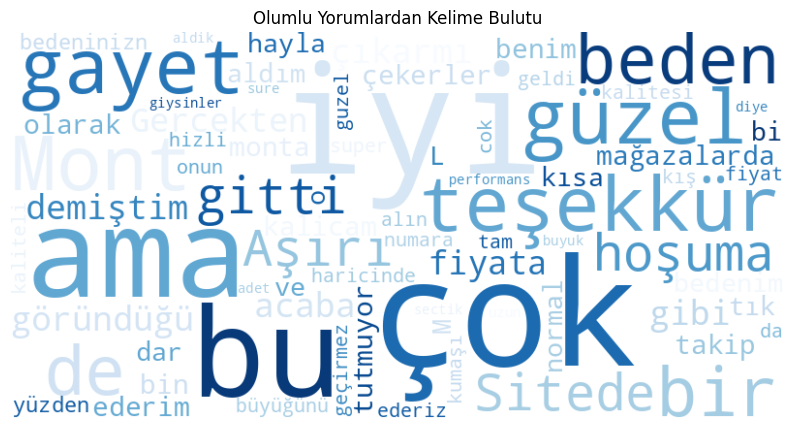

In [71]:
# KELİME BULUTU OLUŞTURMA

import pandas as pd
from textblob import TextBlob

# Yorumlar.csv dosyasını yükle
df = pd.read_csv('yorumlar.csv')  # CSV dosyasını okur ve bir DataFrame'e dönüştürür

# DataFrame'deki sütunları kontrol et
print(df.columns)  # Yorumlar.csv dosyasındaki mevcut sütunları ekrana yazdırır

# Duygu analizi fonksiyonu
def sentiment_analysis(text):
    analysis = TextBlob(str(text))  # TextBlob ile verilen metni analiz eder
    return 'olumlu' if analysis.sentiment.polarity > 0 else 'olumsuz'  # Sentiment (duygu) skoruna göre 'olumlu' veya 'olumsuz' döndürür

# Yorumlar üzerinde duygu analizi yap
df['Duygu'] = df['Yorum'].apply(sentiment_analysis)  # 'Yorum' sütunundaki her bir yorumu analiz eder ve 'Duygu' sütununa ekler

# Olumlu yorumları seç
olumlu_yorumlar = df[df['Duygu'] == 'olumlu']['Yorum'].dropna()  # Sadece olumlu yorumları alır ve boş satırları temizler

# Yorumları birleştir
all_positive_comments = ' '.join(olumlu_yorumlar)  # Olumlu yorumları tek bir metin haline getirir (birleştirir)

# Kelime bulutu oluştur
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Kelime bulutunu oluşturmak için gerekli parametreleri ayarlayın
wordcloud = WordCloud(
    background_color='white',  # Arka plan rengini beyaz yapar
    width=800,  # Kelime bulutunun genişliği
    height=400,  # Kelime bulutunun yüksekliği
    max_words=100,  # En fazla 100 kelimeyi göster
    colormap='Blues'  # Kelimeleri mavi tonlarında renklendirir
).generate(all_positive_comments)  # Olumlu yorumlardan kelime bulutunu oluşturur

# Kelime bulutunu görselleştir
plt.figure(figsize=(10, 6))  # Görselleştirmenin boyutlarını ayarlar
plt.imshow(wordcloud, interpolation='bilinear')  # Kelime bulutunu görüntüler
plt.axis('off')  # Eksenleri kapatır
plt.title('Olumlu Yorumlardan Kelime Bulutu')  # Başlık ekler
plt.show()  # Grafiği gösterir


In [72]:
### EN UZUN YORUM
#Pandas kütüphanesi, Python programlama dilinde veri analizi ve manipülasyonu yapmak için kullanılan çok güçlü bir araçtır.
# Özellikle veri bilimi ve analiz projelerinde sıklıkla tercih edilir.

import pandas as pd

# Yorumlar.csv dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Yorumların uzunluğunu hesaplayarak yeni bir sütun oluştur
df['Yorum Uzunluğu'] = df['Yorum'].apply(lambda x: len(str(x)))

# En uzun yorumu ve uzunluğunu bul
en_uzun_yorum = df.loc[df['Yorum Uzunluğu'].idxmax()]

# Sonucu yazdır (tam yorum)
print("En uzun yorumun tamamı:")
print(en_uzun_yorum['Yorum'])
print(f"Yorum uzunluğu: {en_uzun_yorum['Yorum Uzunluğu']} karakter")


En uzun yorumun tamamı:
14 yaşındaki erkek kardeşim için aldım 155 boyunda 45 kilo s beden aldık gayet güzel. açıkcası bir büyük beden alsam mı diye düşündüm gelişim çağında ki biri için ana 170 boyunda 68 kilo eşim giydi ona bile tam oldu o yüzden bir büyük bedenini almaktan vazgeçtim. içi polarlı ve şişme mont olduğu için acaip sıcak tutar. İstanbul havası için bence bi
Devamını Oku
Yorum uzunluğu: 363 karakter


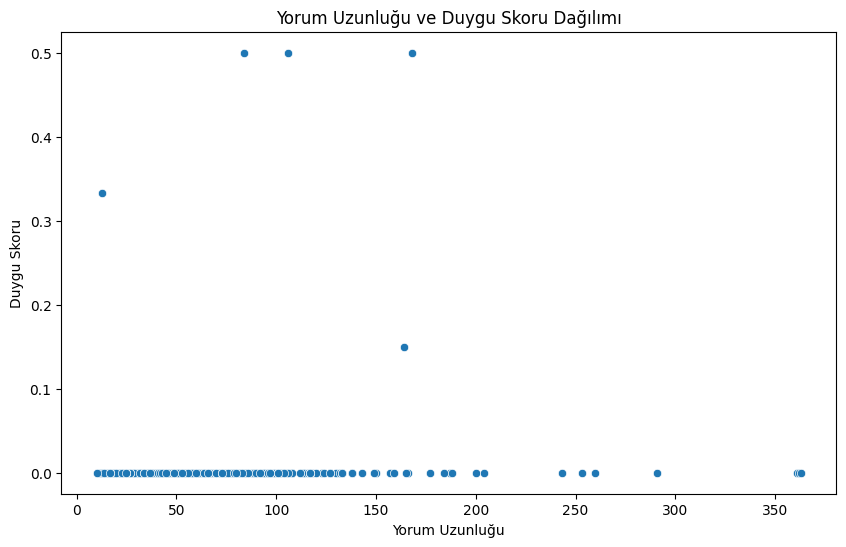

In [73]:
## DAĞILIM GRAFİĞİ

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Yorumlar.csv dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Yorumların uzunluğunu hesapla
df['Yorum_Uzunlugu'] = df['Yorum'].apply(lambda x: len(str(x)))

# Duygu analizi ile duygu skorları (polarite) oluştur
df['Duygu_Skoru'] = df['Yorum'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Dağılım grafiğini çiz
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Yorum_Uzunlugu', y='Duygu_Skoru', data=df)
plt.title('Yorum Uzunluğu ve Duygu Skoru Dağılımı')
plt.xlabel('Yorum Uzunluğu')
plt.ylabel('Duygu Skoru')
plt.show()


In [74]:
import pandas as pd
from collections import Counter

# Yorumlar.csv dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Tüm yorumlarda 'a' harfi sıklığını hesaplamak için bir liste oluşturuyoruz
a_siklik = []

# Her yorumu analiz et
for idx, yorum in df['Yorum'].items():
    # Yorumdaki harfleri sayma (boşluklar hariç)
    harfler = ''.join(yorum.split())  # Yorumdaki tüm boşlukları çıkar
    harf_siklik = Counter(harfler.lower())  # Harflerin sıklığını say ve küçük harf olarak say

    # 'a' harfini sayma
    a_siklik.append((idx, harf_siklik['a']))  # Yorumun indeksini ve 'a' harfi sayısını sakla

# 'a' harfi en fazla olan yorumu bul
max_a_yorum = max(a_siklik, key=lambda x: x[1])
en_cok_a_yorum = df.iloc[max_a_yorum[0]]['Yorum']  # En çok 'a' harfi içeren yorumu al
max_a_sayisi = max_a_yorum[1]  # 'a' harfi sayısını al

# Sonuçları yazdır
print("En çok 'a' harfi içeren yorum:")
print(en_cok_a_yorum)
print("\n'a' harfi sayısı:", max_a_sayisi)


En çok 'a' harfi içeren yorum:
Ürün tam istediğim gibi...Kol ağızları lastikli , cepler fermuarlı ve ic ceple tam5 cep var ve tüm cepler derin ve fonksiyonel...İçi polarlı ve baya sıcaķ tutuyor kış için harika..Elyaf aralığı dağılımı eşit , kalıp çok iyi ama dar biraz 1 beden büyük aldığınızda tam oluyor kazakla vs rahat....Kapişon çıkarılıyor..Hiç bir dikiş hatası vs yok gelen
Devamını Oku

'a' harfi sayısı: 35


In [75]:
import pandas as pd
from collections import Counter

# Yorumlar.csv dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Tüm yorumlarda 'a' harfi sıklığını hesaplamak için bir liste oluşturuyoruz
a_siklik = []

# Her yorumu analiz et
for idx, yorum in df['Yorum'].items():
    # Yorumdaki harfleri sayma (boşluklar hariç)
    harfler = ''.join(yorum.split())  # Yorumdaki tüm boşlukları çıkar
    harf_siklik = Counter(harfler.lower())  # Harflerin sıklığını say ve küçük harf olarak say

    # 'a' harfini sayma
    a_siklik.append((idx, harf_siklik['a']))  # Yorumun indeksini ve 'a' harfi sayısını sakla

# 'a' harfi sayısına göre azalan sırayla sıralama
a_siklik_sorted = sorted(a_siklik, key=lambda x: x[1], reverse=True)

# En çok 'a' harfi içeren yorumları listele
for idx, a_sayisi in a_siklik_sorted:
    yorum = df.iloc[idx]['Yorum']
    print(f"Yorum: {yorum}")
    print(f"'a' harfi sayısı: {a_sayisi}")
    print("-" * 50)


Yorum: Ürün tam istediğim gibi...Kol ağızları lastikli , cepler fermuarlı ve ic ceple tam5 cep var ve tüm cepler derin ve fonksiyonel...İçi polarlı ve baya sıcaķ tutuyor kış için harika..Elyaf aralığı dağılımı eşit , kalıp çok iyi ama dar biraz 1 beden büyük aldığınızda tam oluyor kazakla vs rahat....Kapişon çıkarılıyor..Hiç bir dikiş hatası vs yok gelen
Devamını Oku
'a' harfi sayısı: 35
--------------------------------------------------
Yorum: ürün elime hızlı ve güzel kargolanmış şekilde ulaştı aldığım gün kullanmaya başladım fiyatına göre kaliteli bir ürün dedikleri gibi rüzgarı ve soğuğu geçirmiyor içi polarlı sıcacık tutuyor almak isteyenler gönül rahatlığı ile alabilir. bedeni L olarak sipariş verdim küçük geldi satıcının ilgi ve alakasından da çok memnun kaldım hemen değişim olup
Devamını Oku
'a' harfi sayısı: 32
--------------------------------------------------
Yorum: 14 yaşındaki erkek kardeşim için aldım 155 boyunda 45 kilo s beden aldık gayet güzel. açıkcası bir büyük beden

In [76]:
import pandas as pd

# CSV dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Her yorumdaki harf sayısını hesapla
df['Harf_Sayisi'] = df['Yorum'].apply(lambda x: sum(c.isalpha() for c in str(x)))

# Sonuçları göster
print(df[['Yorum', 'Harf_Sayisi']])


                                                 Yorum  Harf_Sayisi
0    kardesime aldım aşırı kaliteli içi sıcacık tut...           81
1    çok iyi fiyatına göre kalite çok iyi m beden a...           60
2    bu fiyata göre gerçekten iyi bir ürün bir bede...           60
3    beklediğimden de iyi geldi kesinlikle tavsiye ...           77
4    Şahane oldu, çok premium hissettiriyor beden d...           60
..                                                 ...          ...
325  s beden istedim m beden göndermişler m istesey...          100
326  cok kötü dikiş lerim hemen gidiyor hiç memnun ...           62
327  ürün güzel kaliteli bedeninize göre sipariş ve...          140
328                                  Güzel ürün kışlık           15
329                          hafif kaliteli tavsiyedir           23

[330 rows x 2 columns]


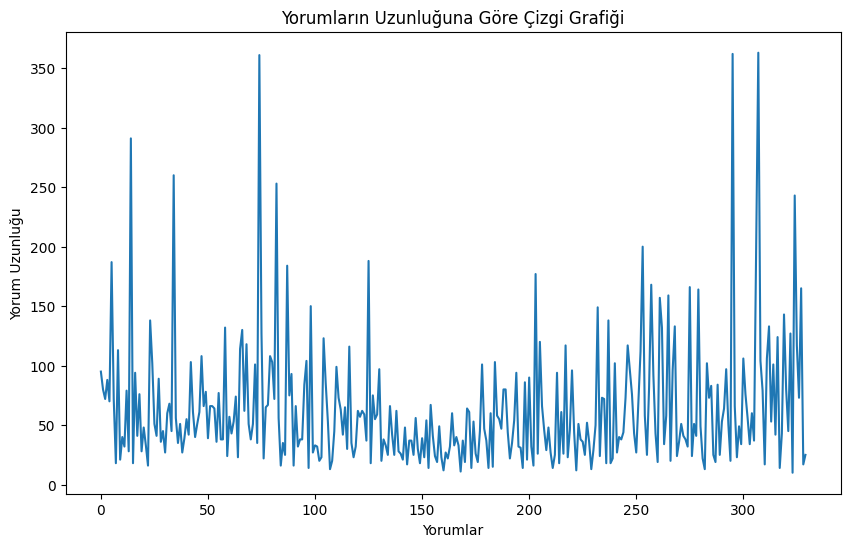

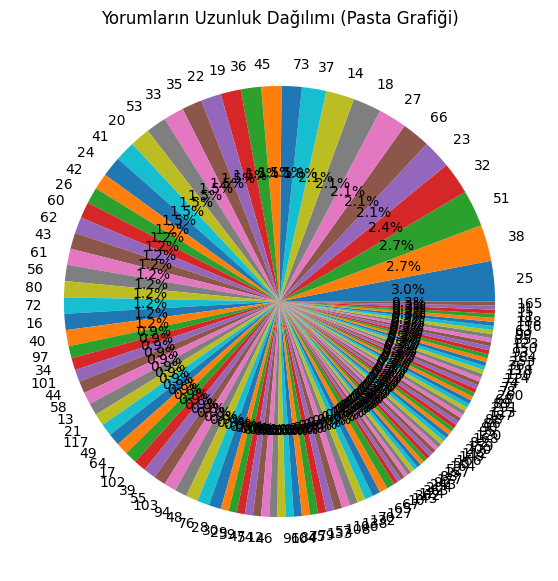

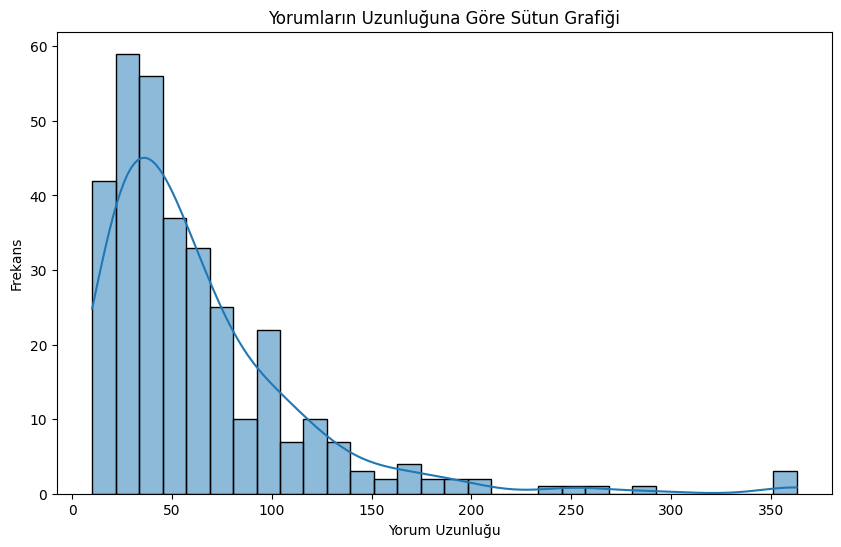

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV dosyasını yükle
df = pd.read_csv('yorumlar.csv')

# Yorumların uzunluğunu hesapla
df['Yorum Uzunluğu'] = df['Yorum'].apply(lambda x: len(str(x)))

# Çizgi grafiği
plt.figure(figsize=(10, 6))
plt.plot(df['Yorum Uzunluğu'])
plt.title('Yorumların Uzunluğuna Göre Çizgi Grafiği')
plt.xlabel('Yorumlar')
plt.ylabel('Yorum Uzunluğu')
plt.show()

# Pasta grafiği
plt.figure(figsize=(7, 7))
df['Yorum Uzunluğu'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Yorumların Uzunluk Dağılımı (Pasta Grafiği)')
plt.ylabel('')
plt.show()

# Sütun grafiği
plt.figure(figsize=(10, 6))
sns.histplot(df['Yorum Uzunluğu'], bins=30, kde=True)
plt.title('Yorumların Uzunluğuna Göre Sütun Grafiği')
plt.xlabel('Yorum Uzunluğu')
plt.ylabel('Frekans')
plt.show()
